In [1]:
!pip install feel_it
!pip install lux
import numpy as np
import pandas as pd
from feel_it import EmotionClassifier, SentimentClassifier


def unique_list(l):
    ulist = []
    [ulist.append(x) for x in l if x not in ulist]
    return ulist

df = pd.read_table('/inferno.txt',header=None)
line_nums = list(df[0].str.extractall(r"(Inferno . Canto .{1,6})")[0].index)
for i in range(0,len(line_nums)):
    line_nums[i] = line_nums[i][0]
line_nums.append(len(df))

inferno = pd.DataFrame(index=[f"Canto-{x}" for x in range(1,35)], columns=["Lines"])
cantos = [f"Canto-{x}" for x in range(1,35)]

i = 1
for c in cantos:
    inferno.at[c, "Lines"] = list(df[0][line_nums[i-1]+1:line_nums[i]])
    i = i + 1

     |████████████████████████████████| 1.9 MB 3.2 MB/s 
     |████████████████████████████████| 3.3 MB 44.1 MB/s 
     |████████████████████████████████| 895 kB 59.8 MB/s 
     |████████████████████████████████| 354 kB 2.7 MB/s 
     |████████████████████████████████| 40 kB 5.0 MB/s 
  Using cached pulsar-2.0.2-py3-none-any.whl (280 kB)
  Using cached multidict-5.1.0-cp37-cp37m-manylinux2014_x86_64.whl (142 kB)
  Created wheel for pulsar-odm: filename=pulsar_odm-0.7.0-py3-none-any.whl size=17003 sha256=7c79a327af328e0cc7858d6658729782f14d79ed37c809dc06daa533c2349cab
  Stored in directory: /root/.cache/pip/wheels/32/24/d8/2e559a0d244f6998e03186b4b4b4b937c6e90a5d7697b627fb
Successfully built pulsar-odm


In [ ]:
# i = 1
# for c in cantos:
#     canto = " ".join(inferno.loc[c]["Lines"])
#     inferno.at[c, "Lines"] = ' '.join(unique_list(canto.split()))
#     i = i + 1

In [2]:
emotion_classifier = EmotionClassifier()

Downloading:   0%|          | 0.00/899 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/794k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.68M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/299 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/414 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [4]:
i = 1
for c in cantos:
    lines_canto = inferno["Lines"][c]
    canto_emotion = emotion_classifier.predict(lines_canto)
    inferno.at[c, "Lines"] = list(zip(lines_canto, canto_emotion))
    i = i + 1

In [77]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [7]:
colors = {"sadness": "b",
          "fear": "m",
          "anger": "r",
          "joy": "y"}

In [128]:
ring1 = inferno["Lines"]["Canto-4"]
ring2 = inferno["Lines"]["Canto-5"]
ring3 = inferno["Lines"]["Canto-6"]
ring4 = inferno["Lines"]["Canto-7"]
ring5 = inferno["Lines"]["Canto-8"] + inferno["Lines"]["Canto-9"]
ring6 = inferno["Lines"]["Canto-10"] + inferno["Lines"]["Canto-11"]
ring7 = inferno["Lines"]["Canto-12"] + inferno["Lines"]["Canto-13"] + inferno["Lines"]["Canto-14"] + inferno["Lines"]["Canto-15"] + inferno["Lines"]["Canto-16"] + inferno["Lines"]["Canto-17"]
ring8 = inferno["Lines"]["Canto-18"] + inferno["Lines"]["Canto-19"] + inferno["Lines"]["Canto-20"] + inferno["Lines"]["Canto-21"] + inferno["Lines"]["Canto-22"] + inferno["Lines"]["Canto-23"] + inferno["Lines"]["Canto-24"] + inferno["Lines"]["Canto-25"] + inferno["Lines"]["Canto-26"] + inferno["Lines"]["Canto-26"] + inferno["Lines"]["Canto-27"] + inferno["Lines"]["Canto-28"] + inferno["Lines"]["Canto-29"] + inferno["Lines"]["Canto-30"]
ring9 = inferno["Lines"]["Canto-32"] + inferno["Lines"]["Canto-33"] + inferno["Lines"]["Canto-34"]

In [144]:
def plot_emotions(ring, name, size):
  y = 10
  x = 0
  for line in range(0, len(ring)):
    plt.plot(y, x, color=colors[ring[line][1]], marker="s", markersize=size)
    x = x+1
    if line % 10 == 0:
      y = y-1
      x = 0
  red_patch = mpatches.Patch(color='red', label='Anger')
  blue_patch = mpatches.Patch(color='blue', label='Sadness')
  m_patch = mpatches.Patch(color='magenta', label='Fear')
  yellow_patch = mpatches.Patch(color='yellow', label='Joy')

  plt.legend(handles=[red_patch, blue_patch, m_patch, yellow_patch], loc='center left', bbox_to_anchor=(1, 0.5))
  plt.xticks([])
  plt.yticks([])
  plt.xlabel("Lines ->")
  plt.ylabel("Lines ->")
  plt.title(name)
  plt.rcParams['figure.figsize'] = 20, 20
  plt.show()

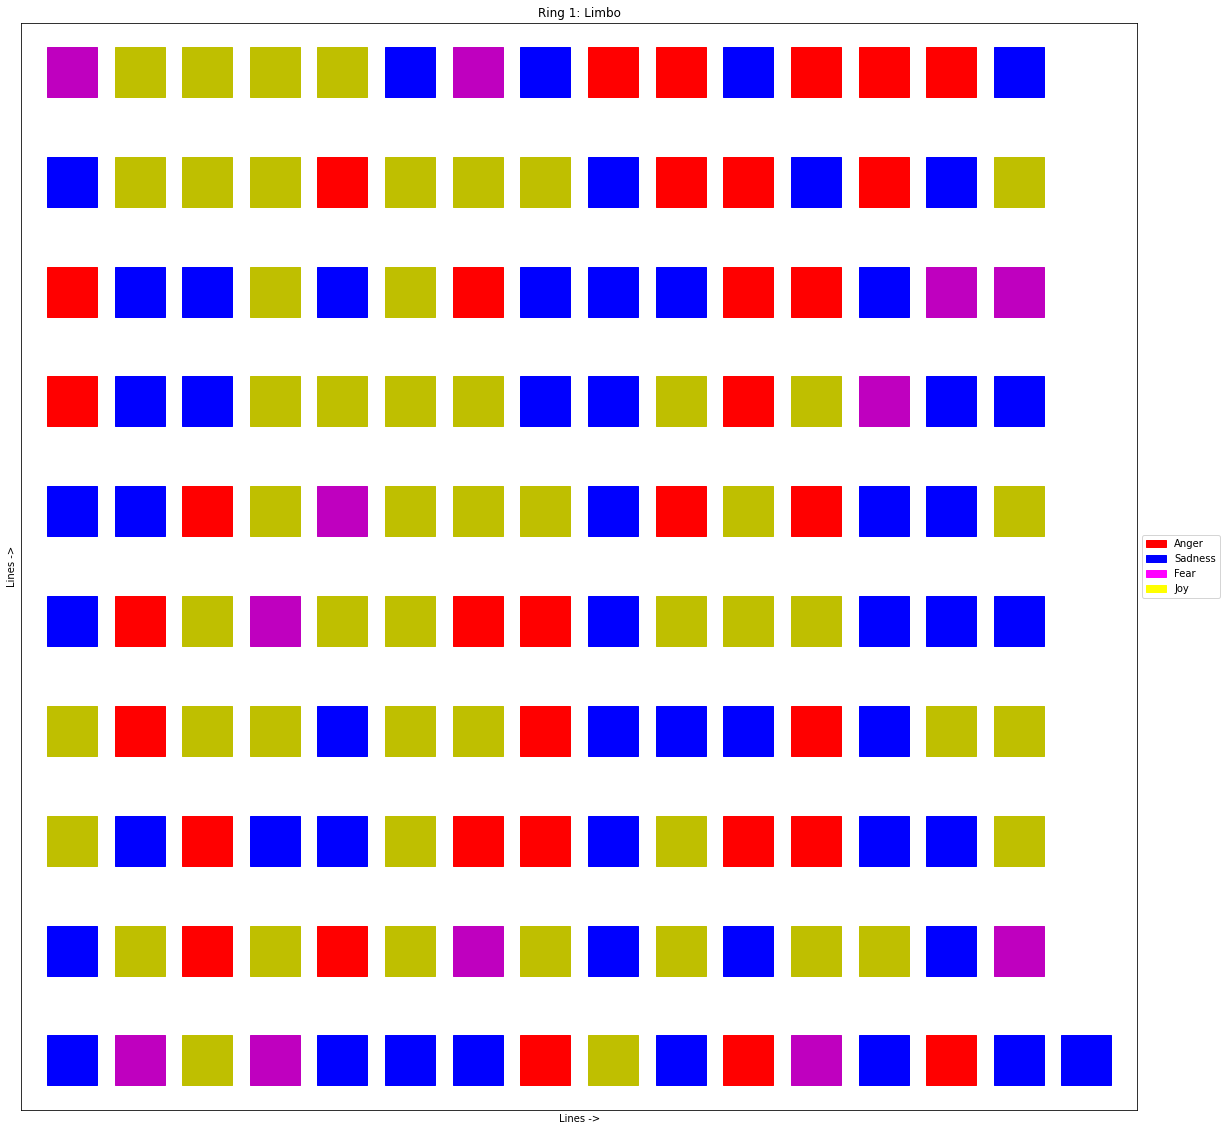

In [147]:
plot_emotions(ring1, "Ring 1: Limbo", 50)

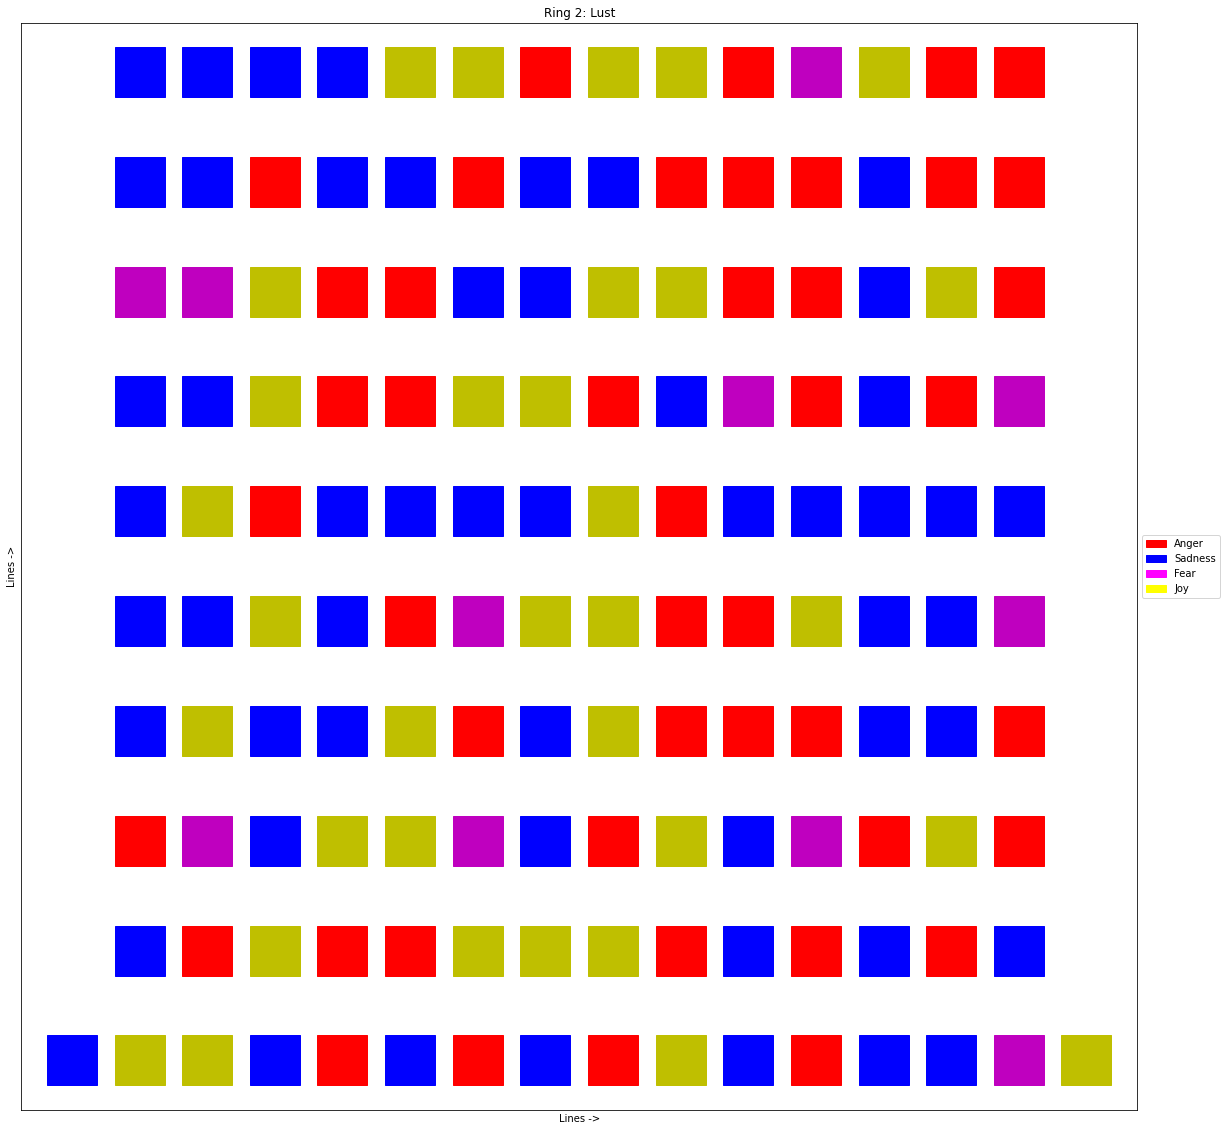

In [148]:
plot_emotions(ring2, "Ring 2: Lust", 50)

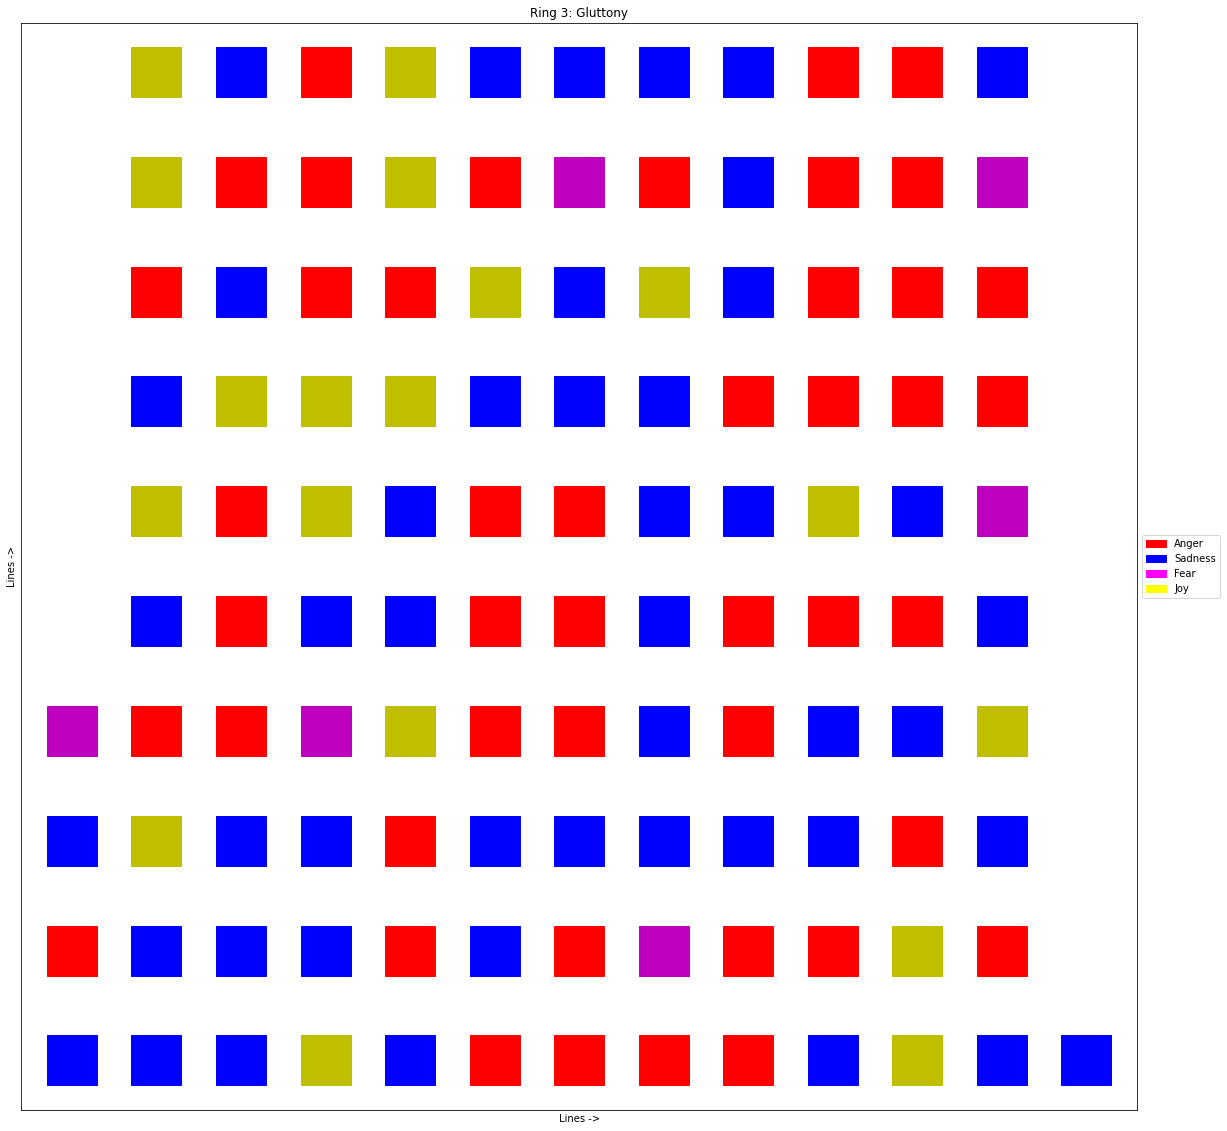

In [149]:
plot_emotions(ring3, "Ring 3: Gluttony", 50)

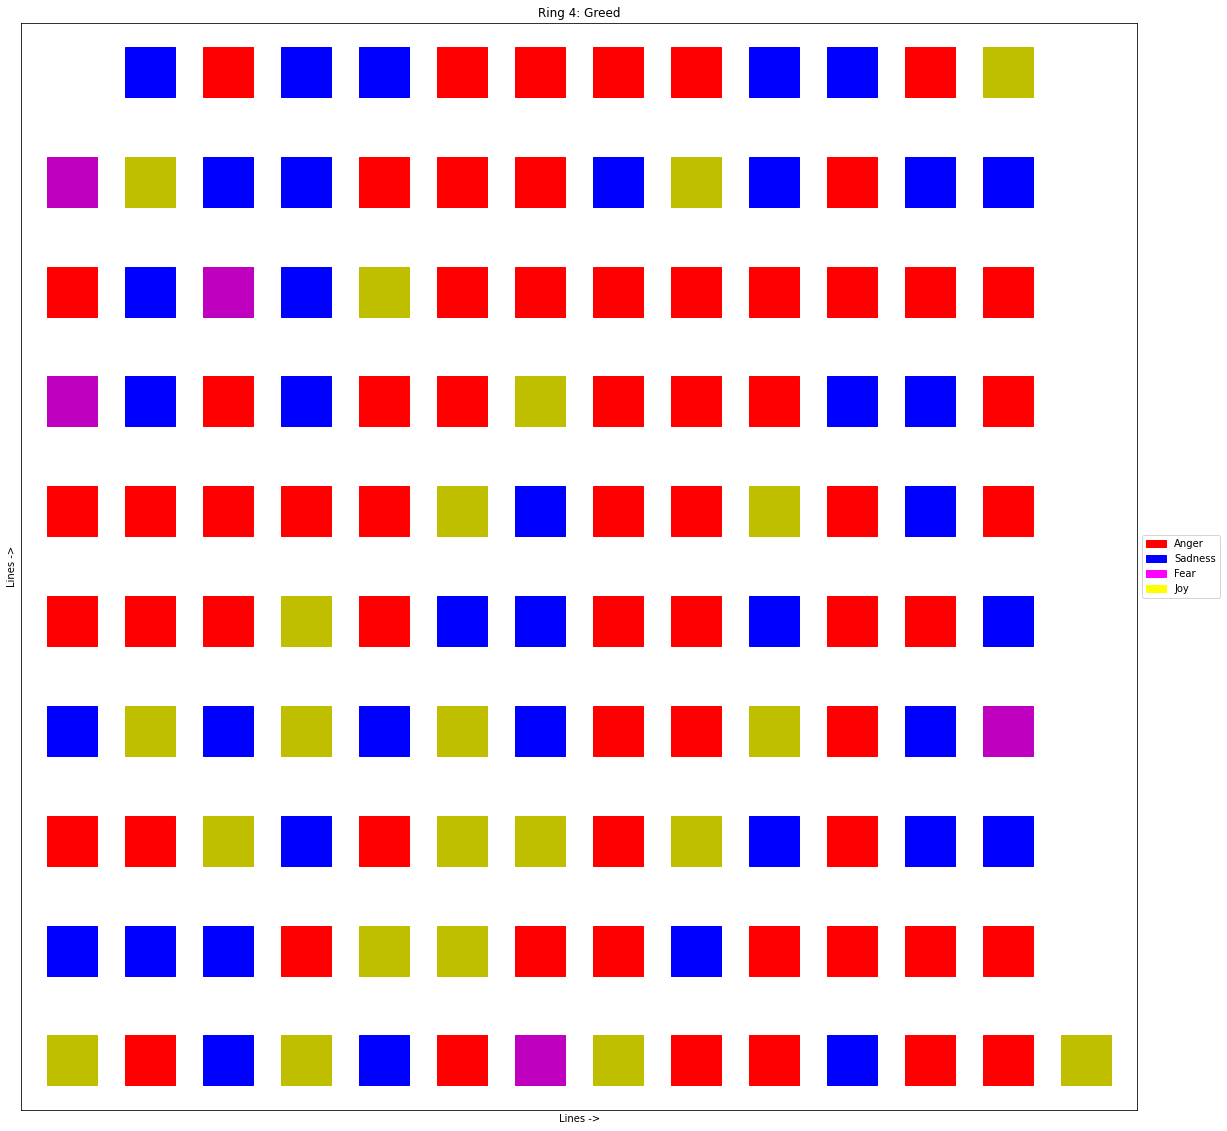

In [150]:
plot_emotions(ring4, "Ring 4: Greed", 50)

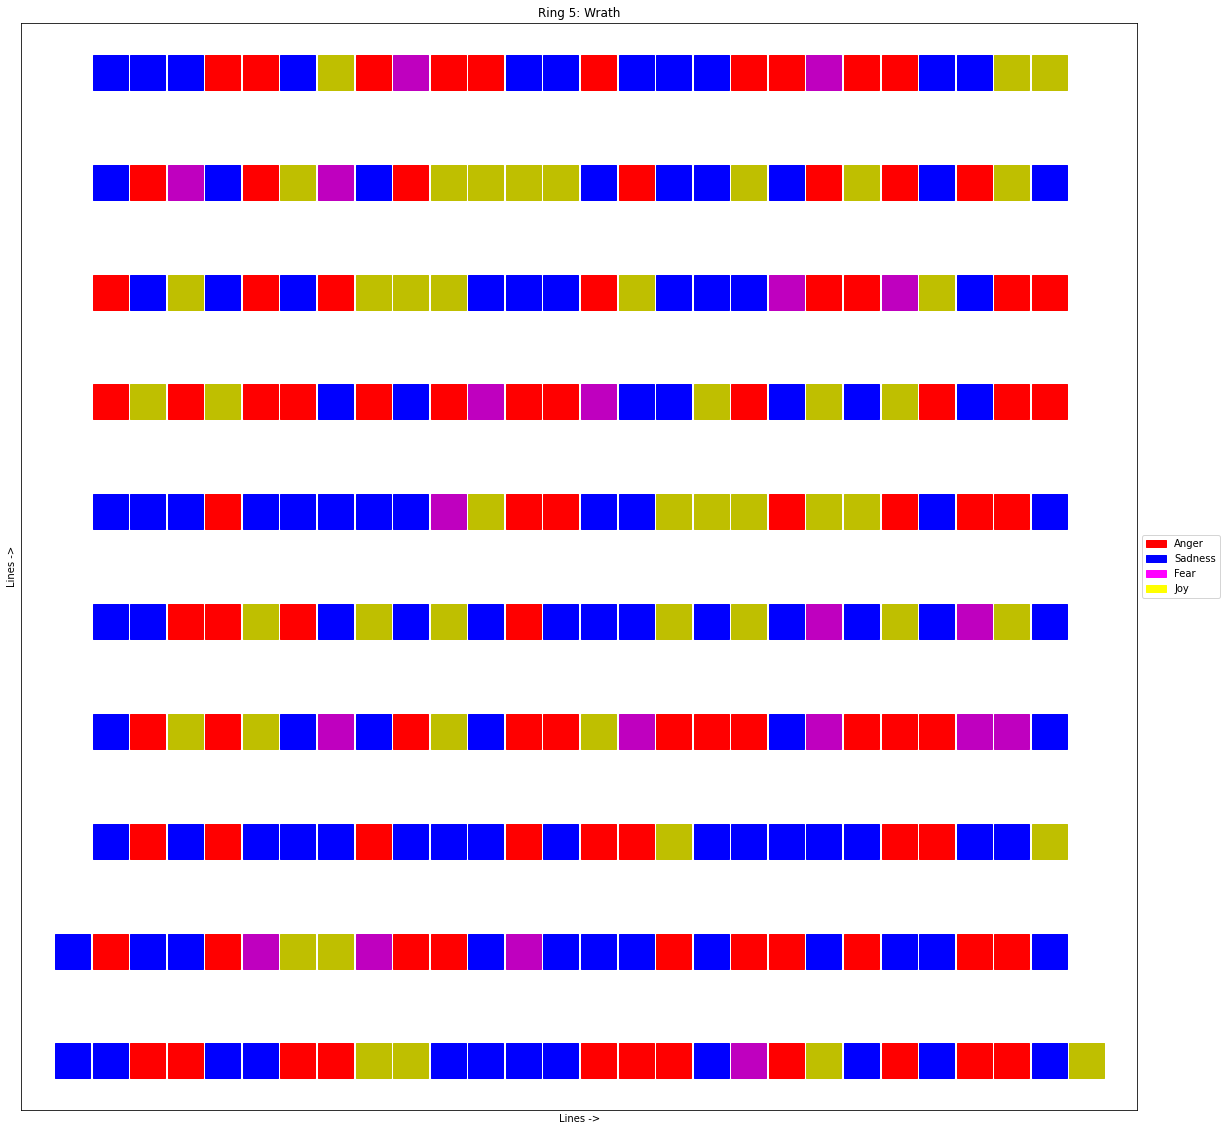

In [155]:
plot_emotions(ring5, "Ring 5: Wrath", 35)

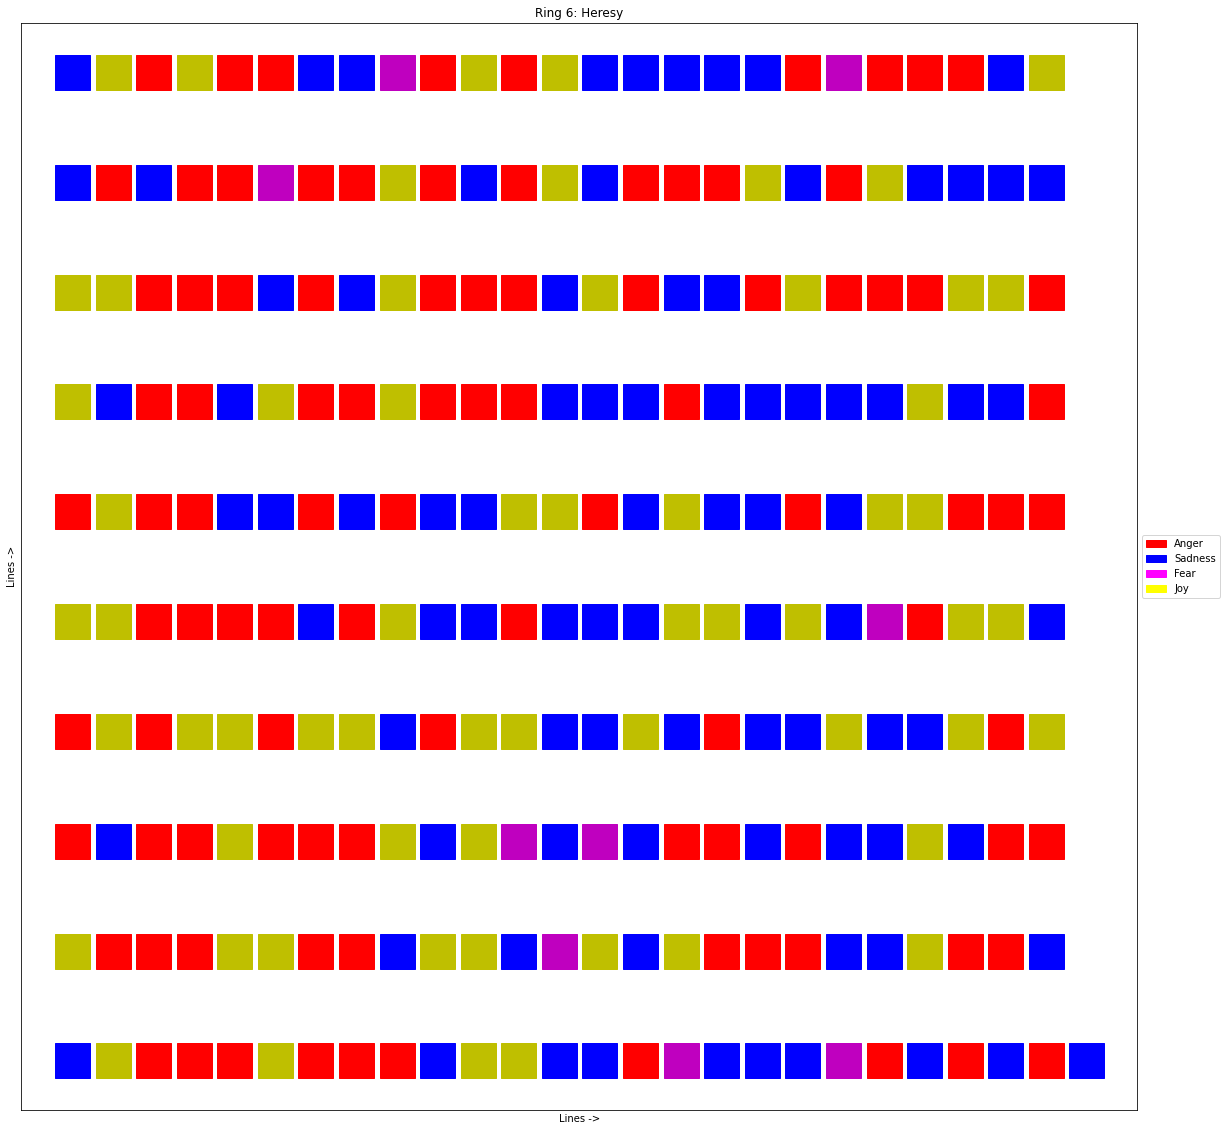

In [157]:
plot_emotions(ring6, "Ring 6: Heresy", 35)

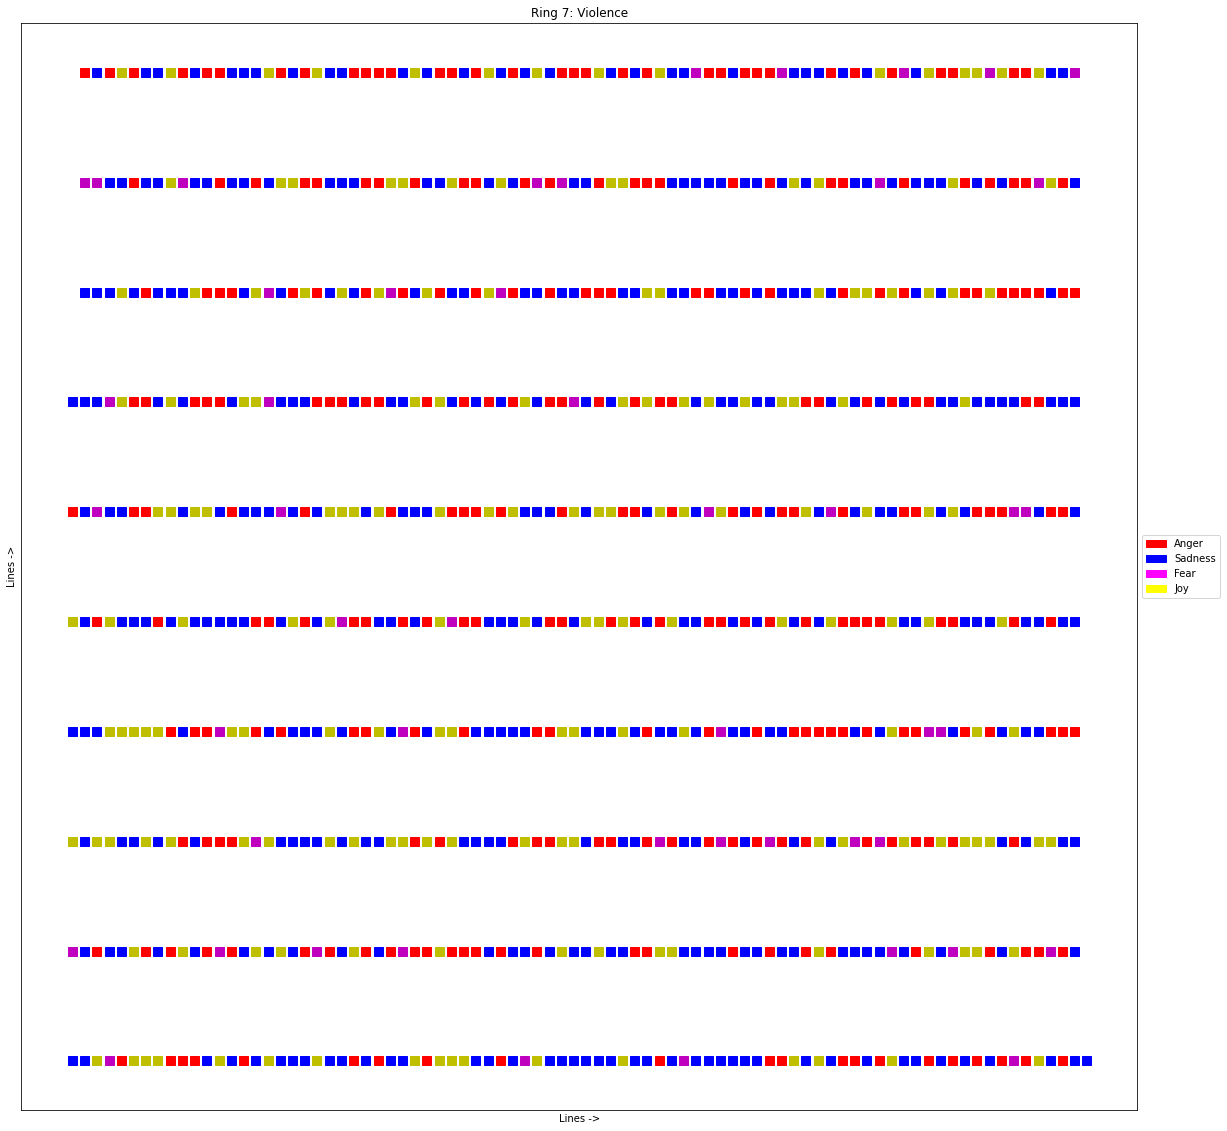

In [158]:
plot_emotions(ring7, "Ring 7: Violence", 9)

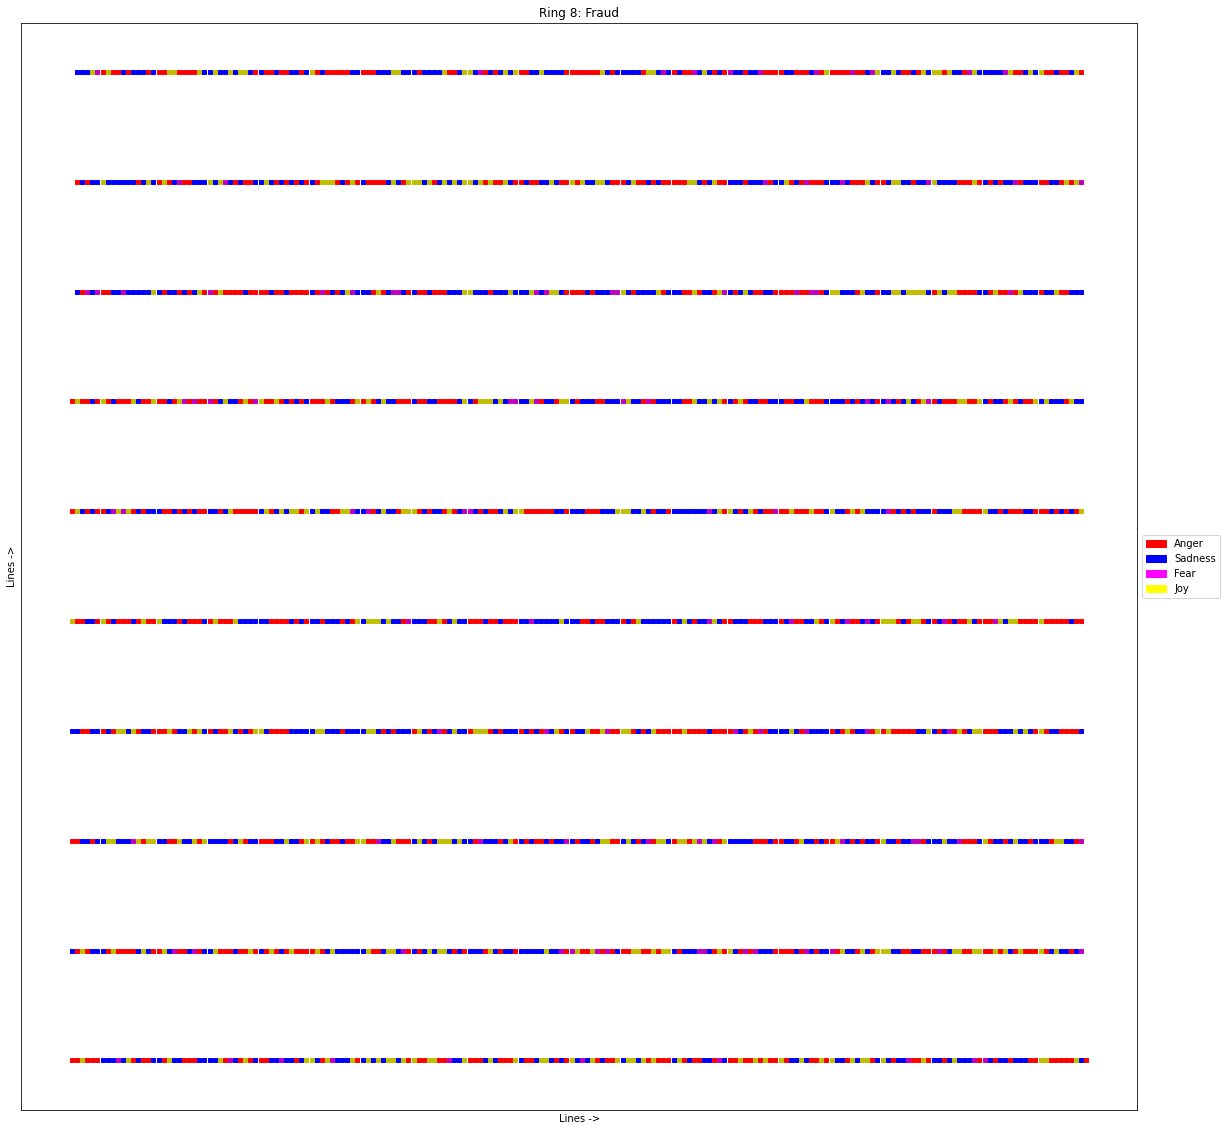

In [161]:
plot_emotions(ring8, "Ring 8: Fraud", 4)

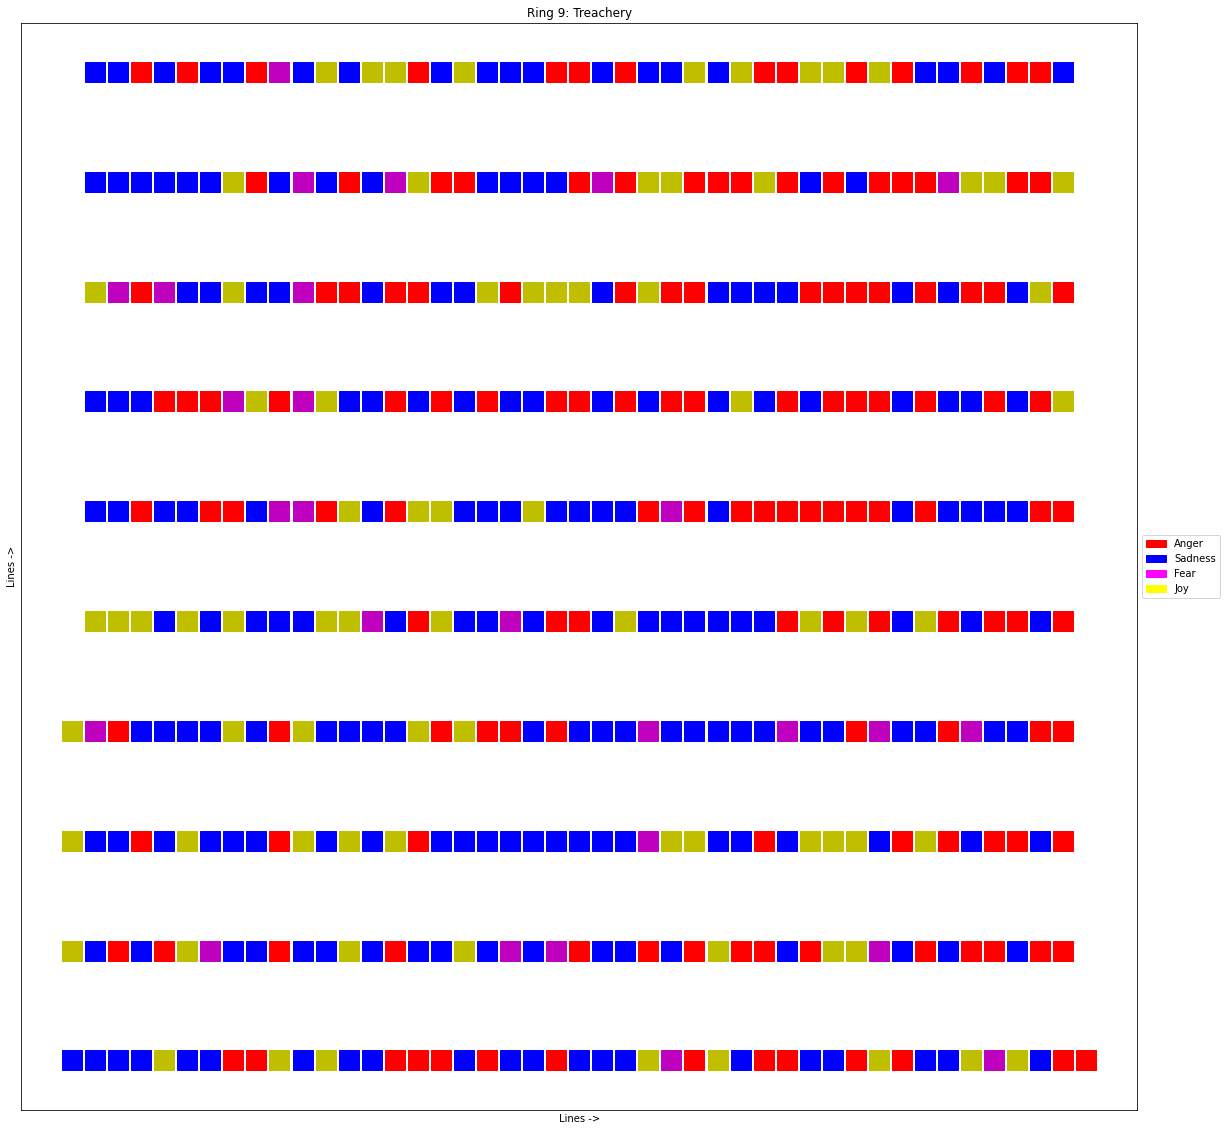

In [166]:
plot_emotions(ring9, "Ring 9: Treachery", 20)